In [1]:
import numpy as np
import time

def update_0(grid):
    # count neighbors
    neighbors = np.zeros(grid.shape, np.int32)
    neighbors[1:-1, 1:-1] += (grid[0:-2, 0:-2] + grid[0:-2, 1:-1] + grid[0:-2, 2:] +
                              grid[1:-1, 0:-2]                    + grid[1:-1, 2:] +
                              grid[2:  , 0:-2] + grid[2:  , 1:-1] + grid[2:  , 2:])
    # apply rules
    rule_1 = np.argwhere((grid == 1) & (neighbors < 2))
    rule_2 = np.argwhere((grid == 1) & ((neighbors == 2) | neighbors == 3))
    rule_3 = np.argwhere((grid == 1) & (neighbors > 3))
    rule_4 = np.argwhere((grid == 0) & (neighbors == 3))

    # set new values
    grid[tuple([rule_1[:,i] for i in range(2)])] = 0
    grid[tuple([rule_2[:,i] for i in range(2)])] = grid[tuple([rule_2[:,i] for i in range(2)])]
    grid[tuple([rule_3[:,i] for i in range(2)])] = 0
    grid[tuple([rule_4[:,i] for i in range(2)])] = 1

    # make sure borders stay null
    grid[0, :] = grid[-1, :] = grid[:, 0] = grid[:, -1] = 0


def update_1(grid):
    # count neighbors
    neighbors = np.zeros(grid.shape, np.int32)
    neighbors[1:-1, 1:-1] += (grid[0:-2, 0:-2] + grid[0:-2, 1:-1] + grid[0:-2, 2:] +
                              grid[1:-1, 0:-2]                    + grid[1:-1, 2:] +
                              grid[2:  , 0:-2] + grid[2:  , 1:-1] + grid[2:  , 2:])
    # apply rules
    grid_1d = grid.ravel() # vs. reshape, flatten
    neighbors_1d = neighbors.ravel()
    rule_1 = np.argwhere((grid_1d == 1) & (neighbors_1d < 2))
    rule_2 = np.argwhere((grid_1d == 1) & ((neighbors_1d == 2) | neighbors_1d == 3))
    rule_3 = np.argwhere((grid_1d == 1) & (neighbors_1d > 3))
    rule_4 = np.argwhere((grid_1d == 0) & (neighbors_1d == 3))

    # set new values
    grid_1d[rule_1] = 0
    grid_1d[rule_2] = grid_1d[rule_2]
    grid_1d[rule_3] = 0
    grid_1d[rule_4] = 1

    # make sure borders stay null
    grid[0, :] = grid[-1, :] = grid[:, 0] = grid[:, -1] = 0


def update_2(grid):
    # count neighbors
    neighbors = np.zeros(grid.shape, np.int32)
    neighbors[1:-1, 1:-1] += (grid[0:-2, 0:-2] + grid[0:-2, 1:-1] + grid[0:-2, 2:] +
                              grid[1:-1, 0:-2]                    + grid[1:-1, 2:] +
                              grid[2:  , 0:-2] + grid[2:  , 1:-1] + grid[2:  , 2:])
    # apply rules
    rule_1 = np.nonzero((grid == 1) & (neighbors < 2))
    rule_2 = np.nonzero((grid == 1) & ((neighbors == 2) | neighbors == 3))
    rule_3 = np.nonzero((grid == 1) & (neighbors > 3))
    rule_4 = np.nonzero((grid == 0) & (neighbors == 3))

    # set new values
    grid[rule_1] = 0
    grid[rule_2] = grid[rule_2]
    grid[rule_3] = 0
    grid[rule_4] = 1

    # make sure borders stay null
    grid[0, :] = grid[-1, :] = grid[:, 0] = grid[:, -1] = 0


def update_3(grid):
    # count neighbors
    neighbors = np.zeros(grid.shape, np.int32)
    neighbors[1:-1, 1:-1] += (grid[0:-2, 0:-2] + grid[0:-2, 1:-1] + grid[0:-2, 2:] +
                              grid[1:-1, 0:-2]                    + grid[1:-1, 2:] +
                              grid[2:  , 0:-2] + grid[2:  , 1:-1] + grid[2:  , 2:])

    # apply rules
    grid[...] = np.where((grid == 1) & ((neighbors < 2) | (neighbors > 3)), 0, grid)
    grid[...] = np.where((grid == 0) & (neighbors == 3), 1, grid)

    ## alternative using np.where
    #dies = np.where((grid == 1) & ((neighbors < 2) | (neighbors > 3)))
    #birth = np.where((grid == 0) & (neighbors == 3))
    #grid[dies] = 0
    #grid[birth] = 1


def update_4(grid):
    # count neighbors
    neighbors = (grid[0:-2, 0:-2] + grid[0:-2, 1:-1] + grid[0:-2, 2:] +
                 grid[1:-1, 0:-2]                    + grid[1:-1, 2:] +
                 grid[2:  , 0:-2] + grid[2:  , 1:-1] + grid[2:  , 2:])

    # apply rules
    birth = (neighbors == 3) & (grid[1:-1, 1:-1] == 0)
    survive = ((neighbors == 2) | (neighbors == 3)) & (grid[1:-1, 1:-1] == 1)
    grid[...] = 0
    grid[1:-1, 1:-1][birth | survive] = 1

/tmp/ipykernel_33115/1738851358.py:16: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = animation.FuncAnimation(fig, update_animation)


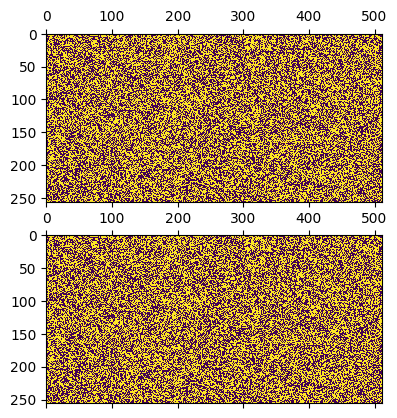

In [2]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation

grid = np.random.randint(0, 2, (256, 512))
fig, (ax1, ax2) = plt.subplots(2, 1)
mat = ax1.matshow(grid)
mat = ax2.matshow(grid)

def update_animation(i):
    start = time.time()
    update_3(grid)
    print(f"game of life update {i}: {time.time() - start} s")
    mat.set_data(grid)
    ax1.set_title(f"game of life update {i}")

anim = animation.FuncAnimation(fig, update_animation)
plt.show()
